[7, 25, 27, 51, 52, 77, 88, 103, 104, 127, 137, 143, 163, 181, 194, 203, 209, 232, 234, 256, 267, 273, 298, 302, 312, 337, 338, 354, 372, 387, 402, 403, 419, 437, 443, 455, 471, 481, 502, 507]
[51, 88, 104, 137, 163, 194, 232, 267, 302, 337, 372, 402, 437, 471, 502]


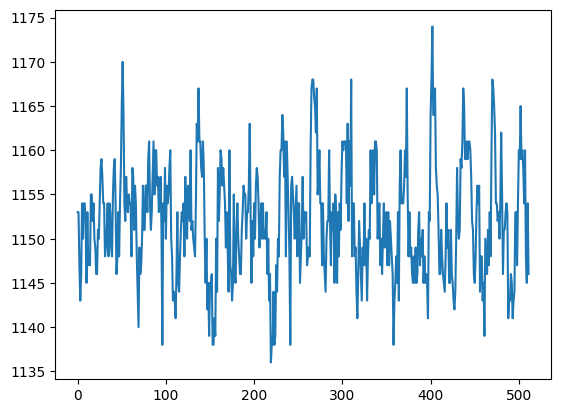

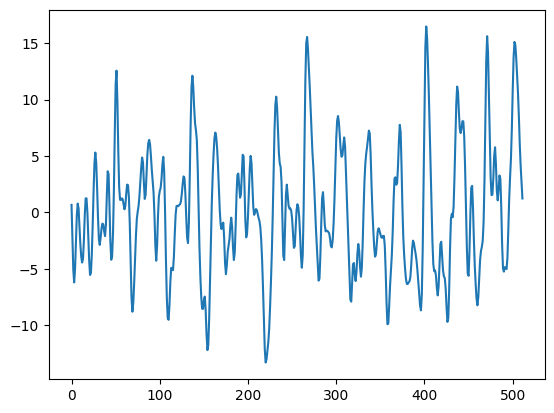

[51, 88, 137, 163, 194, 232, 267, 302, 337, 372, 402, 437, 471, 502]
[51, 104, 137, 163, 203, 232, 267, 302, 337, 372, 402, 437, 471, 502, 533, 568, 606, 638, 674, 706, 739, 774, 817, 878, 918, 945, 978, 1011, 1043, 1070, 1110, 1141, 1176, 1205, 1239, 1311, 1341, 1377, 1410, 1441, 1472, 1506, 1545, 1574, 1603, 1640, 1676, 1710, 1739, 1774, 1806, 1844, 1873, 1908, 1962]


In [1]:
import numpy as np
from algorithms import choi as ch
import matplotlib.pyplot as plt
from algorithms import heartrate as hr
from algorithms import segmenter as sg

data = np.genfromtxt('data/raw_2022-03-14_bcg.csv', delimiter=';')
#signal raw BCG
plt.plot(data[14000:14512])
plt.figure()
preprocessed=ch.preprocessing(data[14000:14512],50.)
plt.plot(preprocessed)
listamassimi=ch.get_segment_maxima(preprocessed,50.)
print(listamassimi)
localmax=ch.get_local_maxima(preprocessed,50.)
print(localmax)
plt.show()
hearthbeatloc=ch.eliminate_false_peaks(preprocessed,50.,localmax)
print(hearthbeatloc)

indices=ch.choi(data[14000:16000],50.)
print(indices)



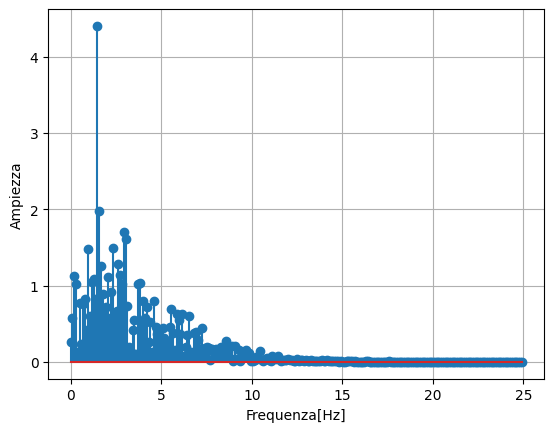

In [2]:
from scipy.fft import fft, fftfreq
#FOURIER TRANSFORM (DFT)

# Number of sample points
N = 512
# sample spacing
T = 1.0 / 50.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = preprocessed
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel("Frequenza[Hz]")
plt.ylabel("Ampiezza")
plt.show()

In [3]:
meanhr=hr.heartrate_from_indices(indices,50.)
print(meanhr)

84.7723704866562


In [4]:
segmentato=sg.segmenter(data[14000:14512],50.) #terne I J K
print(segmentato)
fhrstdv=(hr.get_heartrate_score_pipe(sg.segmenter, index=1))
print(indices)
print(fhrstdv(data[14000:14512],50))

[[  5   9  14]
 [ 45  51  54]
 [ 96 104 109]
 [132 137 140]
 [198 203 206]
 [224 231 236]
 [262 266 272]
 [306 309 316]
 [358 364 369]
 [397 402 408]
 [467 471 476]]
[51, 104, 137, 163, 203, 232, 267, 302, 337, 372, 402, 437, 471, 502, 533, 568, 606, 638, 674, 706, 739, 774, 817, 878, 918, 945, 978, 1011, 1043, 1070, 1110, 1141, 1176, 1205, 1239, 1311, 1341, 1377, 1410, 1441, 1472, 1506, 1545, 1574, 1603, 1640, 1676, 1710, 1739, 1774, 1806, 1844, 1873, 1908, 1962]
(64.93506493506494, 0.26545056036859294)


In [5]:
from algorithms import brueser as br

brue=br.brueser(data[14000:14400],50.)
print(brue[0],brue[1])
brue2=br.brueser2(data[14000:14400],50.)
print(brue2[0],brue2[1])

57.69230769230769 0.17748875433679
[63. 37. 23. 52. 50. 22. 54.] [0.10733236 0.11770327 0.14553991 0.17748875 0.11952119 0.15324726
 0.17263633]
